In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("car data 2.csv")
df


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [6]:
df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [7]:
columns = ["Buy_price","mcost","ndoors","nop","lug_boot","safety","decision"]
df.columns = columns

In [8]:
df.head()
X_list=["Buy_price","mcost","ndoors","nop","lug_boot","safety"]
X=df[X_list]
y=df.decision
y.value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: decision, dtype: int64

In [9]:
df.shape

(1727, 7)

In [10]:
X

,Buy_price,mcost,ndoors,nop,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...
1722,low,low,5more,more,med,med
1723,low,low,5more,more,med,high
1724,low,low,5more,more,big,low
1725,low,low,5more,more,big,med


In [11]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1722     good
1723    vgood
1724    unacc
1725     good
1726    vgood
Name: decision, Length: 1727, dtype: object

In [12]:
dict1= {
 "vhigh":3,
 "high":2,
 "med":1,
 "low":0
}
dict2= {
 "big":2,
 "med":1,
 "small":0
}
dict3= {
 "high":2,
 "med":1,
 "low":0
}
dict4= {
 "unacc":0,
 "acc":1,
 "good":2,
 "vgood":3
}
dict5={
 "2":0,
 "4":1,
 "more":2
}
dict6={
 "2":0,
 "3":1,
 "4":2,
 "5more":3
}
X.Buy_price = X.Buy_price.map(dict1)
X.mcost = X.mcost.map(dict1)
X.lug_boot=X.lug_boot.map(dict2)
X.safety=X.safety.map(dict3)
X.ndoors=X.ndoors.map(dict6)
X.nop=X.nop.map(dict5)
y=y.map(dict4)

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [13]:
X.tail(150)

,Buy_price,mcost,ndoors,nop,lug_boot,safety
1577,0,1,2,1,1,0
1578,0,1,2,1,1,1
1579,0,1,2,1,1,2
1580,0,1,2,1,2,0
1581,0,1,2,1,2,1
...,...,...,...,...,...,...
1722,0,0,3,2,1,1
1723,0,0,3,2,1,2
1724,0,0,3,2,2,0
1725,0,0,3,2,2,1


C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


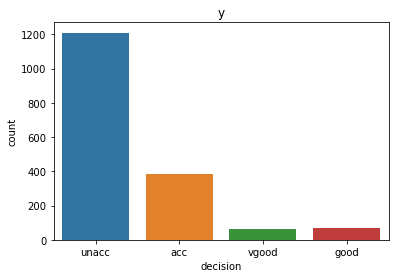

In [14]:
#plot single column by count its value by using count plot
plt.title("y")
sns.countplot(df["decision"])
plt.show()


In [15]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [17]:
clf=DecisionTreeClassifier(random_state=0,criterion="gini")
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [18]:
clf.fit(X_train,y_train)


DecisionTreeClassifier(random_state=0)

In [19]:
y_pred = clf.predict(X_test)


In [20]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

classification_report=classification_report(y_test,y_pred)
print(classification_report)


0.9826589595375722
[[236   3   0   0]
 [  0  73   0   0]
 [  1   0  12   0]
 [  0   1   1  19]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       239
           1       0.95      1.00      0.97        73
           2       0.92      0.92      0.92        13
           3       1.00      0.90      0.95        21

    accuracy                           0.98       346
   macro avg       0.97      0.95      0.96       346
weighted avg       0.98      0.98      0.98       346



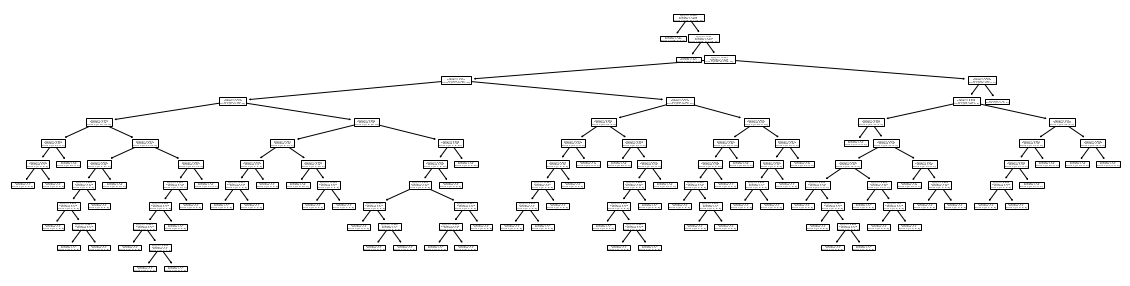

In [117]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,5))
tree.plot_tree(clf.fit(X_train, y_train))
plt.show()

In [21]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

classification_report=classification_report(y_test,y_pred)
print(classification_report)

0.9826589595375722
[[236   3   0   0]
 [  0  73   0   0]
 [  1   0  12   0]
 [  0   1   1  19]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       239
           1       0.95      1.00      0.97        73
           2       0.92      0.92      0.92        13
           3       1.00      0.90      0.95        21

    accuracy                           0.98       346
   macro avg       0.97      0.95      0.96       346
weighted avg       0.98      0.98      0.98       346



In [119]:
clz=DecisionTreeClassifier(random_state=0,criterion="entropy")
clz.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [122]:
y_pred = clz.predict(X_test)

In [123]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

classification_report=classification_report(y_test,y_pred)
print(classification_report)

0.9682080924855492
[[233   6   0   0]
 [  2  71   0   0]
 [  0   2  11   0]
 [  0   1   0  20]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       239
           1       0.89      0.97      0.93        73
           2       1.00      0.85      0.92        13
           3       1.00      0.95      0.98        21

    accuracy                           0.97       346
   macro avg       0.97      0.94      0.95       346
weighted avg       0.97      0.97      0.97       346



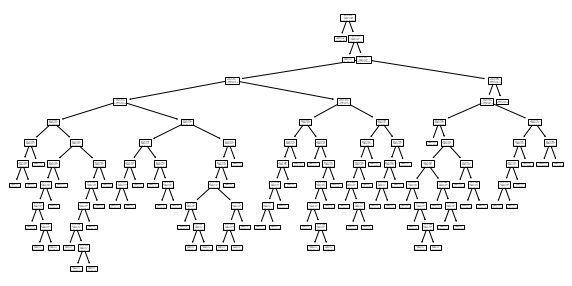

In [124]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10,5))
tree.plot_tree(clz.fit(X_train, y_train))
plt.show()

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
ran_for_clf =RandomForestClassifier()

In [94]:
ran_for_clf.fit(X_train, y_train)

RandomForestClassifier()

In [125]:
y_pred =ran_for_clf.predict(X_train)


In [126]:
ran_for_clf.score(X_train, y_train)

0.7313540912382331

# DecisionTreeClassifier

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier

In [59]:
abc=AdaBoostClassifier()
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [60]:
y_pred = abc.predict(X_test)
y_pred_prob = abc.predict_proba(X_test)

In [62]:
print('Training Score : ',abc.score(X_train,y_train))
print('Testing Score : ',abc.score(X_test,y_test))

Training Score :  0.8559015206372194
Testing Score :  0.8786127167630058


In [64]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[224  14   1   0]
 [ 17  50   6   0]
 [  0   0  12   1]
 [  0   3   0  18]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       239
           1       0.75      0.68      0.71        73
           2       0.63      0.92      0.75        13
           3       0.95      0.86      0.90        21

    accuracy                           0.88       346
   macro avg       0.81      0.85      0.82       346
weighted avg       0.88      0.88      0.88       346



In [68]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

y_pred = gb.predict(X_test)
y_pred_prob = gb.predict_proba(X_test)

In [69]:
print('Training Score : ',gb.score(X_train,y_train))
print('Testing Score : ',gb.score(X_test,y_test))

Training Score :  0.9956553222302679
Testing Score :  0.9855491329479769


In [75]:
bz=BaggingClassifier()
bz.fit(X_train,y_train)

y_pred = bz.predict(X_test)
y_pred_prob = bz.predict_proba(X_test)

In [76]:
print('Training Score : ',bz.score(X_train,y_train))
print('Testing Score : ',bz.score(X_test,y_test))

Training Score :  0.999275887038378
Testing Score :  0.976878612716763


In [81]:
from  xgboost import XGBClassifier
xgb= XGBClassifier()
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)
y_pred_prob = xgb.predict_proba(X_test)

In [80]:
print('Training Score : ',xgb.score(X_train,y_train))
print('Testing Score : ',xgb.score(X_test,y_test))

Training Score :  1.0
Testing Score :  0.9826589595375722


# LogisticRegression

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression


In [145]:
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [146]:
from sklearn.metrics import accuracy_score
precdiction_test=lg.predict(X_test)
accuracy_score(y_test,precdiction_test)


0.7052023121387283

In [147]:
yfit=lr.predict(X_train)


ValueError: x and y must be the same size

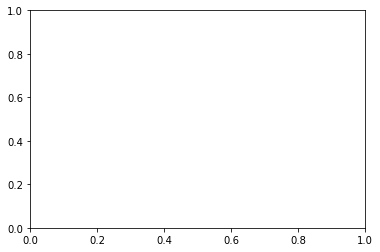

In [148]:
plt.scatter(X_train,y_train)
plt.plot(X_train, yfit, color='red');
plt.show()
 

In [149]:
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [150]:
from sklearn.metrics import accuracy_score
precdiction_test=lg.predict(X_test)
accuracy_score(y_test,precdiction_test)


0.815028901734104

In [159]:
print(classification_report(y_test,precdiction_test))
print(confusion_matrix(y_test,precdiction_test))

TypeError: 'str' object is not callable

In [154]:
from sklearn.neighbors import KNeighborsClassifier

In [155]:
kn=KNeighborsClassifier()
kn.fit(X_train,y_train)

KNeighborsClassifier()

In [156]:
from sklearn.metrics import accuracy_score
precdiction_test=kn.predict(X_test)
accuracy_score(y_test,precdiction_test)


0.9393063583815029

In [92]:
print(classification_report(y_test,precdiction_test))
print(confusion_matrix(y_test,precdiction_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       239
           1       0.84      0.92      0.88        73
           2       0.60      0.69      0.64        13
           3       1.00      0.57      0.73        21

    accuracy                           0.92       346
   macro avg       0.85      0.79      0.80       346
weighted avg       0.93      0.92      0.92       346

[[231   7   1   0]
 [  6  67   0   0]
 [  2   2   9   0]
 [  0   4   5  12]]


In [97]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [98]:
from sklearn.svm import SVC
classifier = SVC(kernel = "linear", random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [99]:
y_pred = classifier.predict(X_test)

In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)*100

[[223  14   2   0]
 [ 28  44   1   0]
 [  4   2   7   0]
 [  0   5   0  16]]


83.8150289017341

In [101]:
#grid search
from sklearn.model_selection import GridSearchCV

parameters = { 'C' : [1,10,100,1000 ] }
grid = GridSearchCV( classifier, parameters )  
          
            
    
grid.fit( X_train, y_train )
          

GridSearchCV(estimator=SVC(kernel='linear', random_state=0),
             param_grid={'C': [1, 10, 100, 1000]})

In [102]:
accuracy=grid.best_score_

In [103]:
accuracy

0.857358865693507

In [108]:
classifier=SVC(kernel="rbf",gamma=0.8)
classifier.fit( X_train, y_train )

SVC(gamma=0.8)

In [109]:
y_pred=classifier.predict(X_test)

In [113]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuaracy=accuracy_score(y_test,y_pred)

In [114]:
accuaracy

0.9653179190751445